### Here I finally checked that full-fracture-length solution gives reference results with high accuracy. I used mid-point approximation for integral equation. It is important that in front of fracture green fuction should be multiplier 0.5 and integral over sources should be equal 2/s

In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [2]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":1}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

### Here I cheked right parts

In [3]:
from well import Well
import pandas as pd

In [8]:
ref_df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')
y_true = ref_df.iloc[:,[1]]
Fcd = float(y_true.columns[0].replace(',', '.'))
ts = np.array(ref_df["Td_xf"])
print("Fcd = {}".format(Fcd))

Fcd = 0.628318531


In [9]:
xw = 0
yw = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":Fcd, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xw, yw, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)

In [10]:
y_pred_new = []
for t in ts:
    y_pred_new.append(real_well.get_pw(t))

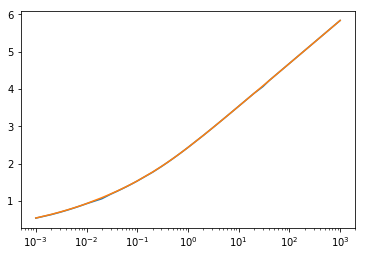

In [11]:
plt.xscale("log")
plt.plot(ts,y_true)
plt.plot(ts, y_pred_new)

In [17]:
y_ = np.array(y_true).flatten()
(y_ - y_pred_new)/y_

array([ -3.69129806e-03,  -9.22954319e-03,  -7.96626024e-03,
        -6.68066612e-03,  -5.76428573e-03,  -4.93726975e-03,
        -4.34889237e-03,  -3.88408689e-03,  -3.51240001e-03,
        -3.20465206e-03,  -2.59847107e-02,  -5.81828023e-03,
        -4.67735611e-03,  -3.78777433e-03,  -3.17312992e-03,
        -2.67545500e-03,  -2.26870767e-03,  -1.95340833e-03,
        -1.70770455e-03,  -2.87011682e-03,  -1.93318838e-03,
        -1.33915324e-03,  -9.38585238e-04,  -7.27613977e-04,
        -5.44753337e-04,  -4.28310104e-04,  -3.44535951e-04,
        -2.97777781e-04,  -3.21795213e-04,  -1.61405387e-04,
        -1.02026956e-04,  -9.55819236e-05,  -6.27081612e-05,
        -4.47809363e-05,  -3.42579721e-05,  -3.78314309e-05,
        -2.56018383e-05,  -1.82543472e-05,  -4.93619988e-03,
        -1.26781670e-05,  -1.10744553e-05,  -5.45391461e-06,
         7.16209450e-06,  -7.56326292e-06,  -1.06427554e-05,
         6.78774617e-06,   6.80415047e-06,  -1.22722603e-06,
        -2.89739983e-07,

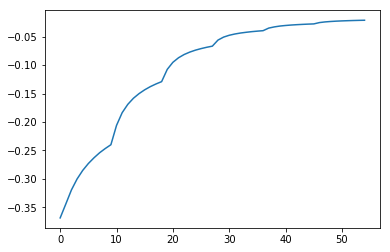

In [22]:
dx = (np.array(y_true).flatten() - y_pred_new)/np.array(y_true).flatten()
dx.shape
plt.plot(dx)

In [18]:
ss = np.log(2.)/np.logspace(-3,1,5)

In [24]:
s = ss[2]
real_well.lapl_well.recalc(s)
new_src = real_well.lapl_well.source_distrib

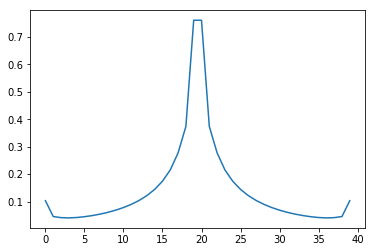

In [25]:
#plt.plot(old_src)
plt.plot(new_src)